Blob detection (LoG, DoG, SimpleBlobDetector) and corner detection (Harris, Shi-Tomasi).

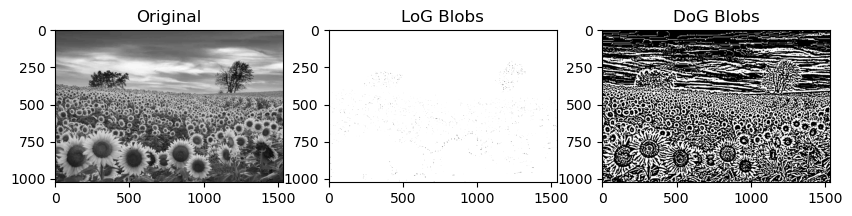

In [33]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Load image
image = cv2.imread('sunflower.jpg', cv2.IMREAD_GRAYSCALE)

# --- LoG ---
sigma = 2
blurred = cv2.GaussianBlur(image, (0, 0), sigma)

# Apply Laplacian
laplacian = cv2.Laplacian(blurred, cv2.CV_64F)

# Normalize and threshold
laplacian_norm = cv2.normalize(laplacian, None, 0, 255, cv2.NORM_MINMAX)
_, log_blobs = cv2.threshold(np.uint8(laplacian_norm), 50, 255, cv2.THRESH_BINARY)

# --- DoG ---
sigma1, sigma2 = 2, 4
gaussian1 = cv2.GaussianBlur(image, (0, 0), sigma1)
gaussian2 = cv2.GaussianBlur(image, (0, 0), sigma2)

# Compute Difference of Gaussian
dog = gaussian2 - gaussian1

# Normalize and threshold
dog_norm = cv2.normalize(dog, None, 0, 255, cv2.NORM_MINMAX)
_, dog_blobs = cv2.threshold(np.uint8(dog_norm), 50, 255, cv2.THRESH_BINARY)

# Display results
plt.figure(figsize=(10, 5))
plt.subplot(1, 3, 1), plt.title("Original"), plt.imshow(image, cmap='gray')
plt.subplot(1, 3, 2), plt.title("LoG Blobs"), plt.imshow(log_blobs, cmap='gray')
plt.subplot(1, 3, 3), plt.title("DoG Blobs"), plt.imshow(dog_blobs, cmap='gray')
plt.show()


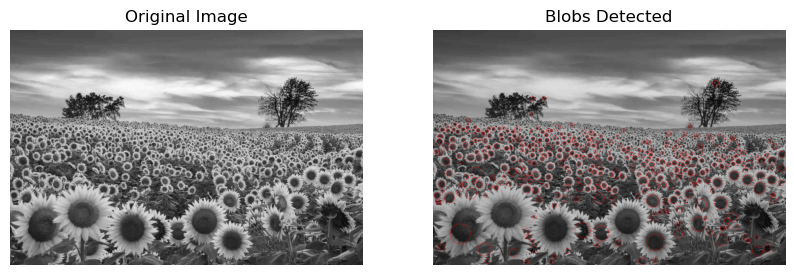

In [32]:
# Set up the detector parameters
params = cv2.SimpleBlobDetector_Params()
params.minThreshold = 10
params.maxThreshold = 200
params.filterByArea = True
params.minArea = 150
params.maxArea = 5000
params.filterByCircularity = True
params.minCircularity = 0.1
params.filterByConvexity = True
params.minConvexity = 0.5
params.filterByInertia = True
params.minInertiaRatio = 0.1

# Create a detector with the parameters
detector = cv2.SimpleBlobDetector_create(params)

# Detect blobs
keypoints = detector.detect(image)

# Draw detected blobs as red circles
blob_image = cv2.drawKeypoints(
    image, keypoints, np.array([]), (0, 0, 255),
    cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS
)

# Convert the image from BGR to RGB for Matplotlib
blob_image_rgb = cv2.cvtColor(blob_image, cv2.COLOR_BGR2RGB)

# Plot original and blob-detected images side by side
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(image, cmap="gray")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.title("Blobs Detected")
plt.imshow(blob_image_rgb)
plt.axis("off")

plt.show()


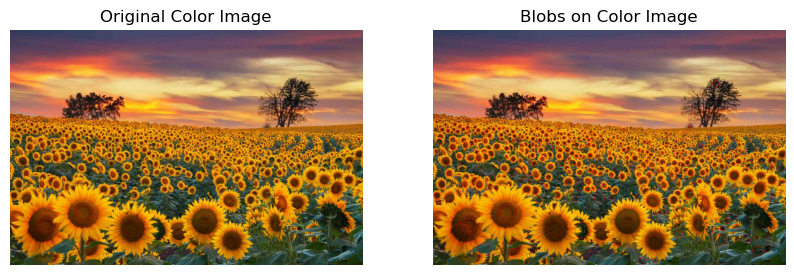

In [35]:
color_image = cv2.imread('sunflower.jpg')

# Convert the color image to grayscale
gray_image = cv2.cvtColor(color_image, cv2.COLOR_BGR2GRAY)

# Set up the detector parameters
params = cv2.SimpleBlobDetector_Params()
params.minThreshold = 10
params.maxThreshold = 200
params.filterByArea = True
params.minArea = 150
params.filterByCircularity = True
params.minCircularity = 0.1
params.filterByConvexity = True
params.minConvexity = 0.5
params.filterByInertia = True
params.minInertiaRatio = 0.1

# Create a blob detector with the parameters
detector = cv2.SimpleBlobDetector_create(params)

# Detect blobs on the grayscale image
keypoints = detector.detect(gray_image)

# Draw blobs on the original color image
blob_image_color = cv2.drawKeypoints(
    color_image, keypoints, np.array([]), (0, 0, 255),
    cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS
)

# Convert BGR to RGB for Matplotlib
blob_image_rgb = cv2.cvtColor(blob_image_color, cv2.COLOR_BGR2RGB)

# Display original and blob-detected images using Matplotlib
plt.figure(figsize=(10, 5))

# Original color image
plt.subplot(1, 2, 1)
plt.title("Original Color Image")
plt.imshow(cv2.cvtColor(color_image, cv2.COLOR_BGR2RGB))
plt.axis("off")

# Blob-detected image
plt.subplot(1, 2, 2)
plt.title("Blobs on Color Image")
plt.imshow(blob_image_rgb)
plt.axis("off")

plt.show()
